首先写出逻辑回归的关键函数，实现 Sigmoid 激活函数，用于将线性模型的输出转换为概率值。

In [48]:
import numpy as np
def sigmoid(x):
    t = 1 + np.exp(-x)   # 计算分母
    result = np.divide(1, t)  # 计算分子与分母的商得出输出值
    return result

接着构建整个逻辑回归类，将函数添加进去

In [51]:
class LogisticRegression:
    def sigmoid(x):
        t = 1 + np.exp(-x)   # 计算分母
        result = np.divide(1, t)  # 计算分子与分母的商得出输出值
        return result

接着构建训练类，在完成后将其加入逻辑回归类

In [54]:
class Model:
    '''
    该构造函数的主要作用是初始化模型的参数。
    在后续的模型训练或预测过程中，self.theta 将被用来计算预测值或更新模型参数。
    '''
    def __init__(self,theta):
        self.theta = theta


接着向其中加入预测函数

In [57]:
class Model:
    '''
    该构造函数的主要作用是初始化模型的参数。
    在后续的模型训练或预测过程中，self.theta 将被用来计算预测值或更新模型参数。
    '''
    def __init__(self,theta):
        self.theta = theta

    def predict(self, x_test):
          
        t = np.dot(x_test, self.theta)
        # 得出类别为 1 的概率
        result = LogisticRegression.sigmoid(t)
        # 通过对result的判别输出 1或0
        return np.round(result)

我采取的是批量梯度下降，下面将要定义初始化方法并且加入梯度下降函数（梯度函数的实现参考了网上的博客）

In [60]:
def __gradient_func(self, x_data, y_data):
    """
    :param x_data: 特征值
    :param y_data: 标签值
     """
    gradient_vector = np.zeros(self.theta.size)
    data_len = x_data.shape[0]
    fetature_len = self.theta.shape[0]

    # 遍历特征维度
    for t in range(fetature_len):
        j_ = 0
        # 遍历样本数据
        for i in range(0, data_len, round(data_len / self.batch_n)):
            # 计算θx_1 + θx_2 + ... + θx_n    也就是公式中的(θ^TX)
            t1 = np.dot(x_data[i], self.theta)
            # 计算预测值 h_θ(x_i)
            h_theta = LogisticRegression.sigmoid(t1)
            # 结果累加起来 (h_θ(x_i) - y_i)x_ij
            j_ += (h_theta - y_data[i]) * x_data[i][t]
        # 除以处理的样本数量,也就是取均值
        j_ /= self.batch_n
        # 修改梯度下降方向向量中对应的值
        gradient_vector[t] = j_

    # 更新全局 θ 的值,也就是朝着下山的方向走一步
    self.theta = self.theta - self.alpha * gradient_vector
    # 输出是否梯度是否达到阀值
    return np.abs(gradient_vector.sum()) >= self.valve


定义迭代函数

In [63]:
 def fit(self,x_data,y_data):
        """
        :param x_data: 特征值
        :param y_data: 标签值
        """
        iter_cnt = 0
        data_len = x_data.shape[0]
        # 验证样参数是否满足要求,并使其满足要求
        self.batch_n = data_len if self.batch_n <= 0 or self.batch_n > data_len else self.batch_n
        # 开始迭代
        while self.__gradient_func(x_data,y_data) and iter_cnt < self.max_iter:
            iter_cnt += 1  #迭代次数的计算
        return self.Model(self.theta)

最后将Model类完成并加入逻辑回归类中

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def sigmoid(x):
        t = 1 + np.exp(-x)  # 计算分母
        result = np.divide(1, t)  # 计算分子与分母的商得出输出值
        return result

    class Model:
        '''
        该构造函数的主要作用是初始化模型的参数。
        在后续的模型训练或预测过程中，self.theta 将被用来计算预测值或更新模型参数。
        '''

        def __init__(self, theta):
            self.theta = theta

        def predict(self, x_test):
            t = np.dot(x_test, self.theta)
            # 得出类别为 1 的概率
            result = LogisticRegression.sigmoid(t)
            # 通过对result的判别输出 1或0
            return np.round(result)

    def __init__(self, alpha, theta, valve, batch_n=-1, max_iter=10 ** 3):
        # 定义学习率,初始化向量用(用于梯度表示)设置阈值，选取所要使用的数据，设置最大迭代次数
        self.alpha = alpha
        self.theta = theta
        self.valve = valve
        self.batch_n = batch_n
        self.max_iter = max_iter

    def __gradient_func(self, x_data, y_data):
        """
        :param x_data: 特征值
        :param y_data: 标签值
        """
        gradient_vector = np.zeros(self.theta.size)
        data_len = x_data.shape[0]
        feature_len = self.theta.shape[0]

        # 遍历特征维度
        for t in range(feature_len):
            j_ = 0
            # 遍历样本数据
            for i in range(0, data_len, round(data_len / self.batch_n)):
                # 计算θx_1 + θx_2 + ... + θx_n    也就是公式中的(θ^TX)
                t1 = np.dot(x_data[i], self.theta)
                # 计算预测值 h_θ(x_i)
                h_theta = LogisticRegression.sigmoid(t1)
                # 结果累加起来 (h_θ(x_i) - y_i)x_ij
                j_ += (h_theta - y_data[i]) * x_data[i][t]
            # 除以处理的样本数量,也就是取均值
            j_ /= self.batch_n
            # 修改梯度下降方向向量中对应的值
            gradient_vector[t] = j_

        # 更新全局 θ 的值,也就是朝着下山的方向走一步
        self.theta = self.theta - self.alpha * gradient_vector
        # 输出是否梯度是否达到阀值
        return np.abs(gradient_vector.sum()) >= self.valve

    def fit(self, x_data, y_data):
        """
        :param x_data: 特征值
        :param y_data: 标签值
        """
        iter_cnt = 0
        data_len = x_data.shape[0]
        # 验证样参数是否满足要求,并使其满足要求
        self.batch_n = data_len if self.batch_n <= 0 or self.batch_n > data_len else self.batch_n
        # 开始迭代
        while self.__gradient_func(x_data, y_data) and iter_cnt < self.max_iter:
            iter_cnt += 1  # 迭代次数的计算

        return self.Model(self.theta)


引入Dry_Bean_Dataset数据集来展示效果,首先展示数据情况。

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')
Data length: 2148
Color list length: 2148


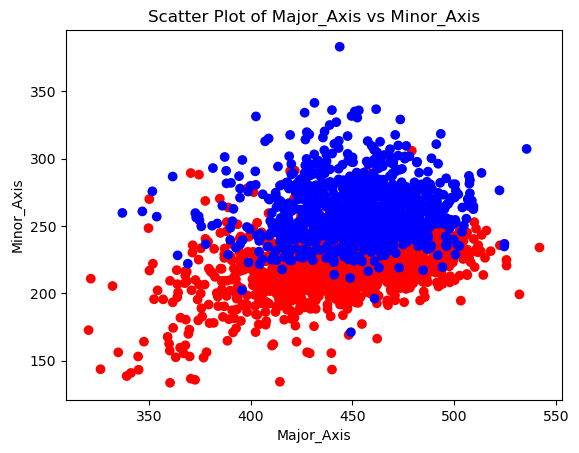

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("D:\\firstweek\\Pistachio_28_Features_Dataset.csv")
df = pd.DataFrame(data)

# 打印列名以确认
print(df.columns)

# 检查数据长度
print(f"Data length: {len(df)}")

# 初始化颜色列表
color = []

# 遍历 'Class' 列并设置颜色
for i in df['Class'][0:3349]:
    if i == 'Kirmizi_Pistachio':
        color.append('red')
    else:
        color.append('blue')

# 检查颜色列表长度
print(f"Color list length: {len(color)}")

# 绘制散点图
plt.scatter(df['Major_Axis'][0:3349], df['Minor_Axis'][0:3349], color=color)
plt.xlabel('Major_Axis')
plt.ylabel('Minor_Axis')
plt.title('Scatter Plot of Major_Axis vs Minor_Axis')
plt.show()

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')
Data length: 2148


C:\Users\30916\AppData\Local\Temp\ipykernel_6484\520993143.py:3: RuntimeWarning: overflow encountered in exp
  t = 1 + np.exp(-x)   # 计算分母


Color list length: 2148


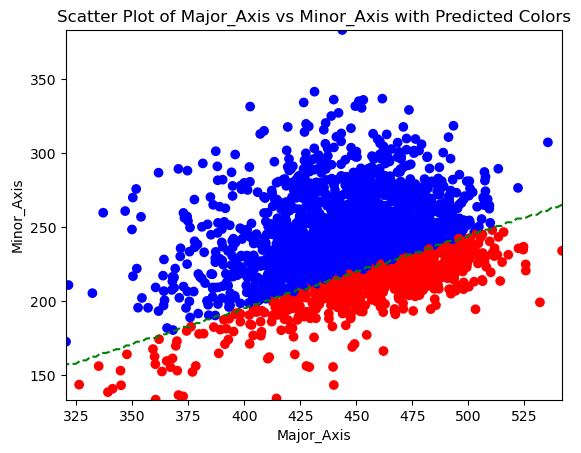

In [155]:
# 读取数据
data = pd.read_csv("D:\\firstweek\\Pistachio_28_Features_Dataset.csv")
df = pd.DataFrame(data)

# 打印列名以确认
print(df.columns)

# 检查数据长度
print(f"Data length: {len(df)}")

# 提取特征和标签
X = df[['Major_Axis', 'Minor_Axis']].values
y = df['Class'].apply(lambda x: 1 if x == 'Kirmizi_Pistachio' else 0).values

# 添加偏置项
X = np.c_[np.ones((X.shape[0], 1)), X]  # 添加一列1作为偏置项

# 初始化模型参数
alpha = 0.01
theta = np.zeros(X.shape[1])  # 初始化 theta 包含偏置项
valve = 0.01
batch_n = 32
max_iter = 1000

# 创建模型实例
model = LogisticRegression(alpha, theta, valve, batch_n, max_iter)

# 训练模型
trained_model = model.fit(X, y)

# 预测结果
y_pred = trained_model.predict(X)  # 使用包含偏置项的 X 进行预测

# 初始化颜色列表
color = ['red' if i == 1 else 'blue' for i in y_pred]

# 检查颜色列表长度
print(f"Color list length: {len(color)}")

# 绘制散点图
plt.scatter(df['Major_Axis'][0:3349], df['Minor_Axis'][0:3349], color=color)
plt.xlabel('Major_Axis')
plt.ylabel('Minor_Axis')
plt.title('Scatter Plot of Major_Axis vs Minor_Axis with Predicted Colors')

# 绘制决策边界
x1_min, x1_max = df['Major_Axis'].min(), df['Major_Axis'].max()
x2_min, x2_max = df['Minor_Axis'].min(), df['Minor_Axis'].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]
probs = LogisticRegression.sigmoid(grid.dot(trained_model.theta))
probs = probs.reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='green', linestyles='--')

plt.show()